In [4]:
import warnings

warnings.filterwarnings("ignore")

# third party
from sklearn.datasets import load_diabetes

# synthcity absolute
from synthcity.plugins import Plugins

eval_plugin = "adsgan"

[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [5]:
# synthcity absolute
from synthcity.plugins.core.dataloader import GenericDataLoader

X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

loader = GenericDataLoader(X, target_column="target", sensitive_columns=["sex"])

loader.dataframe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [6]:
# synthcity absolute
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(loader)

  8%|▊         | 849/10000 [02:02<22:03,  6.91it/s]  


In [7]:
syn_model.generate(count=10).dataframe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.050087,-0.044642,0.035918,-0.008418,0.053581,0.033986,0.006144,-0.006134,-0.069452,-0.022014,157.316337
1,-0.029743,0.050680,0.017759,-0.032914,-0.072262,-0.069388,0.011801,-0.038793,-0.044831,-0.065970,124.252126
2,0.071088,0.050680,0.084533,0.069003,-0.004593,-0.000845,-0.037681,0.001141,-0.012457,0.017179,346.000000
3,0.017961,-0.044642,0.062532,-0.027627,0.022637,0.011608,0.058249,0.001532,-0.044294,-0.022609,126.323924
4,-0.066025,-0.044642,-0.048608,-0.044160,-0.056284,-0.047545,0.005711,-0.049401,-0.067406,-0.116457,110.395567
5,0.066502,0.050680,-0.028851,0.038060,0.042942,0.037427,-0.022097,0.038419,0.002451,0.070546,229.392521
6,0.059006,0.050680,-0.025205,0.058660,0.037741,0.033710,-0.016236,-0.002710,-0.060099,0.041342,216.260819
7,0.082330,0.050680,0.042665,0.028987,-0.050672,-0.051148,-0.019371,0.003881,-0.021941,-0.034724,270.122272
8,-0.024095,-0.044642,-0.040146,-0.016430,-0.027653,-0.060323,0.055928,-0.046238,0.020729,-0.011731,98.687618
9,0.089414,0.050680,0.057880,0.069075,0.034457,0.047900,-0.072646,0.073646,0.071550,0.072162,324.395084


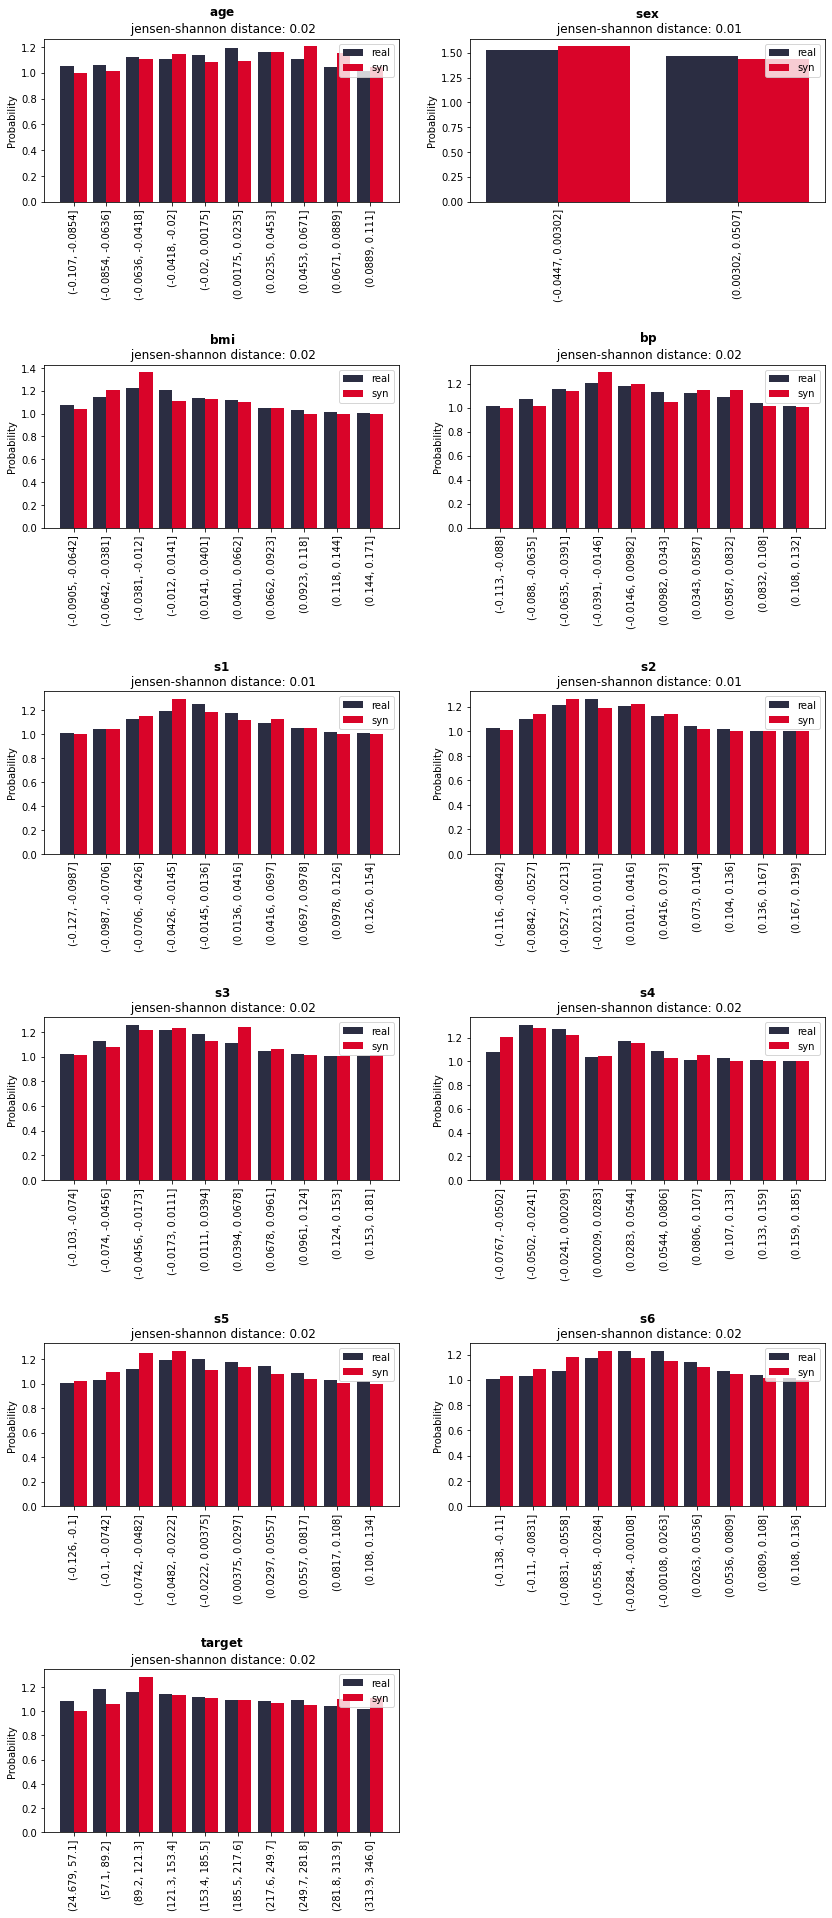

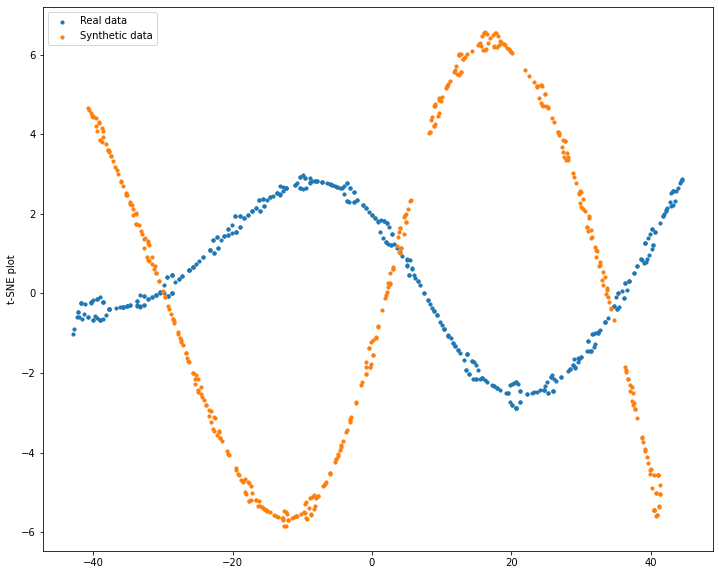

In [8]:
# third party
import matplotlib.pyplot as plt

syn_model.plot(plt, loader)

plt.show()

In [9]:
# synthcity absolute
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [
        (eval_plugin, eval_plugin, {"n_iter": 50})
    ],  # (testname, plugin, plugin_args). REPLACE {"n_iter" : 50} with {} for better performance
    loader,
    repeats=2,
    metrics={"detection": ["detection_mlp"]},  # DELETE THIS LINE FOR ALL METRICS
)

100%|██████████| 50/50 [00:05<00:00,  9.42it/s]


In [15]:
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [
        ("marginal_distributions", "marginal_distributions", {}),
        ("dummy_sampler", "dummy_sampler", {}),
    ],
    loader,
    repeats=2,
)

In [16]:
Benchmarks.print(score)


Comparatives


,marginal_distributions,dummy_sampler
sanity.data_mismatch.score,0.0 +/- 0.0,0.0 +/- 0.0
sanity.common_rows_proportion.score,0.0 +/- 0.0,0.748 +/- 0.0
sanity.nearest_syn_neighbor_distance.mean,0.289 +/- 0.0,0.02 +/- 0.0
sanity.close_values_probability.score,0.459 +/- 0.0,0.994 +/- 0.0
sanity.distant_values_probability.score,0.011 +/- 0.0,0.003 +/- 0.0
stats.jensenshannon_dist.marginal,0.024 +/- 0.0,0.004 +/- 0.0
stats.chi_squared_test.marginal,0.997 +/- 0.0,0.995 +/- 0.0
stats.inv_kl_divergence.marginal,0.778 +/- 0.0,0.994 +/- 0.0
stats.ks_test.marginal,0.753 +/- 0.0,0.971 +/- 0.0
stats.max_mean_discrepancy.joint,0.006 +/- 0.0,0.001 +/- 0.001
